# NeuroMet

Instructions:
* this notebook cannot be used for two different analysis at the same time. If you are unsure if someone is using it click on File / Make a copy and work with the copy.
* to run a cell press Umschalt (Shift) + Enter
* to correctly run the workflow _EVERY_ cell has to be ran
* When you run a cell, there is at first an [*] on the left, then a number (maybe an updated number) when the cell ran.
* normally the only thing to adjust in the settings is 1.6 Subject

In [1]:
## External Modules

In [3]:
import os, glob 
from pipeline.NeuroMet2_dev_fs7 import NeuroMet
from IPython.display import Image
%matplotlib inline

In [4]:
## Settings

In [5]:
## Paths
raw_data_dir = '/media/drive_s/AG/AG-Floeel-Imaging/00-Rohdaten/02_niftis/NeuroMET2_LauraGöschel/2_Messkohorte'
base_dir = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2'
temp_dir = '/home/WorkFlowTemp/NeuroMet2_fs7_quant'

#Working directory
w_dir = os.path.join(base_dir, 'Structural_Analysis_fs7_quant')


#cores
cores = 6
omp_nthreads = 3

#overwrite copied files?
overwrite = False

**subject_list**:
* to analyze all subjects cut&paste below: `subject_list = [ x.split('/')[-1][8:11] for x in os.listdir(w_dir) if x.startswith('NeuroMet')]`
* to analyse only some subjects use the format: `subject_list = ['subject number', 'subject number' ... ]` i.e.: `subject_list = ['001']` or `subject_list = ['001', '003']` 

In [7]:
subject_list = ['2054T1', '2059T1', '2060T1', '2061T1', '2106T1', '2107T1', '2108T1', '2004T2', '2006T2']

In [8]:
# Workflow - 1st part - SPM Segment and Mask generation

In [9]:
neuromet_creator = NeuroMet(subject_list, temp_dir, w_dir, omp_nthreads, raw_data_dir, overwrite)

In [10]:
## Copy from raw data

In [13]:
neuromet_creator.copy_from_raw_data()

Copying NeuroMET2_054_T1
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMET2_059_T1
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMET2_060_T1
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMET2_061_T1
/media/drive_s/AG/AG-Floeel-Imaging/00-Rohdaten/02_niftis/NeuroMET2_LauraGöschel/2_Messkohorte/NeuroMET2_061/NeuroMET2_061_T1/MDC_0131_NeuroMET2_061_T1_19450626_NeuroMET2_061_T1_20201028/123240_WIP944_mp2rage_0.75iso_TR5_UNI_Images_0013/20201029_120216NeuroMET2-061-T1-0013-0001WIP944mp2rage075isoTR5MDC-0131NeuroMET2-061-T1s013a001.nii.gz copyed to /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/NeuroMET2_061_T1/NeuroMET2_061_T1.UNI_mp2rage_orig.nii.gz
/media/drive_s/AG/AG-Floeel-Imaging/00-Rohdaten/02_niftis/NeuroMET2_LauraGöschel/2_Messkohorte/NeuroMET2_061/NeuroMET2_061_T1/MDC_0131_NeuroMET2_061_T1_19450626_NeuroMET2_061_T1_20201028/123240_WIP944_mp2rage_0.75iso_TR5_UNI_DEN_0012/20201029_120

In [14]:
## Tissue Segmentation Pipeline

In [15]:
neuromet = neuromet_creator.make_neuromet1_workflow()

201124-16:21:28,824 nipype.workflow INFO:
	 Generated workflow graph: ./imgs/neuromet.png (graph2use=colored, simple_form=True).


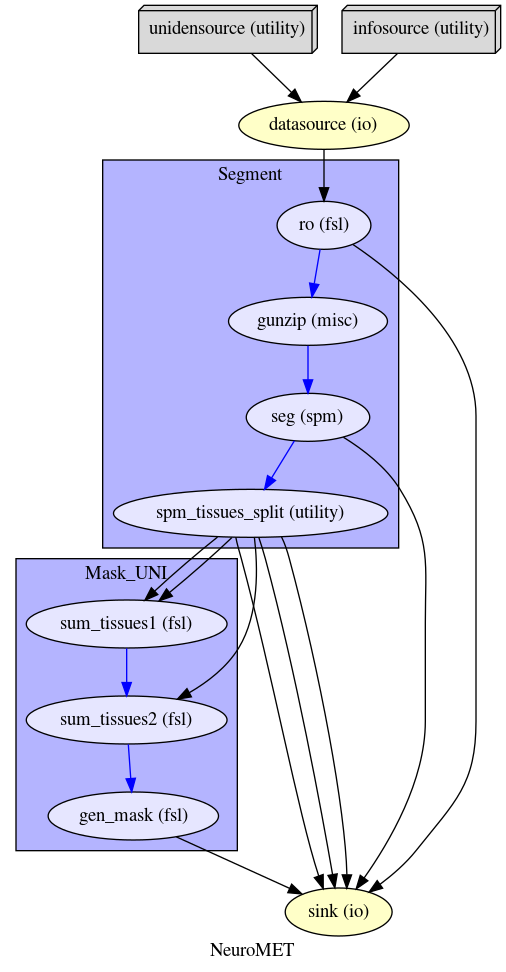

In [17]:
neuromet.write_graph(graph2use = 'colored', dotfilename = './imgs/neuromet')
Image(filename='./imgs/neuromet.png')

In [18]:
%%time
neuromet.run('MultiProc', plugin_args={'n_procs': cores})

201124-16:21:31,514 nipype.workflow INFO:
	 Workflow NeuroMET settings: ['check', 'execution', 'logging', 'monitoring']
201124-16:21:31,623 nipype.workflow INFO:
	 Running in parallel.
201124-16:21:31,630 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 18 jobs ready. Free memory (GB): 28.20/28.20, Free processors: 6/6.
201124-16:21:31,715 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.datasource" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/_subject_id_2_004_T2/_uniden_DEN/datasource".
201124-16:21:31,716 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.datasource" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/_subject_id_2_108_T1/_uniden_DEN/datasource".201124-16:21:31,717 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.datasource" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/_subject_id_2_107_T1/_uniden_DEN/datasource".

201124-16:21:31,718 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.datasource" in "/me

201124-16:21:41,733 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Segment.gunzip" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Segment/_subject_id_2_004_T2/_uniden_DEN/gunzip".201124-16:21:41,734 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Segment.gunzip" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Segment/_subject_id_2_107_T1/_uniden_DEN/gunzip".
201124-16:21:41,738 nipype.workflow INFO:
	 [Node] Running "gunzip" ("nipype.algorithms.misc.Gunzip")

201124-16:21:41,751 nipype.workflow INFO:
	 [Node] Running "gunzip" ("nipype.algorithms.misc.Gunzip")
201124-16:21:42,37 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Segment.ro".
201124-16:21:42,224 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Segment.gunzip".
201124-16:21:42,231 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Segment.gunzip".
201124-16:21:42,421 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Segment.ro".
201124-16:21:42,426 nipype.workflow INFO:
	 [Node] Fini

fslmaths /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Segment/_subject_id_2_108_T1/_uniden_DEN/seg/c1NeuroMET2_108_T1.DEN_mp2rage_orig_reoriented.nii  -add /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Segment/_subject_id_2_108_T1/_uniden_DEN/seg/c2NeuroMET2_108_T1.DEN_mp2rage_orig_reoriented.nii /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_108_T1/_uniden_DEN/sum_tissues1/c1NeuroMET2_108_T1.DEN_mp2rage_orig_reoriented_maths.nii.gz
201124-16:27:17,707 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Mask_UNI.sum_tissues1".
201124-16:27:17,961 nipype.workflow INFO:
	 [Job 23] Completed (NeuroMET.Mask_UNI.sum_tissues1).
201124-16:27:17,965 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 13 jobs ready. Free memory (GB): 27.20/28.20, Free processors: 1/6.
                     Currently running:
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET

201124-16:27:25,975 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 13 jobs ready. Free memory (GB): 27.20/28.20, Free processors: 1/6.
                     Currently running:
                       * NeuroMET.sink
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
201124-16:27:26,85 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Mask_UNI.sum_tissues2" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_107_T1/_uniden_DEN/sum_tissues2".
201124-16:27:26,98 nipype.workflow INFO:
	 [Node] Running "sum_tissues2" ("nipype.interfaces.fsl.maths.MultiImageMaths"), a CommandLine Interface with command:
fslmaths /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_107_T1/_uniden_DEN/sum_tissues1/c1NeuroMET2_107_T1.DEN_mp2rage_orig_reoriented_maths.nii.gz  -add /media/NFSr_work/WorkFlowTemp

201124-16:27:34,73 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Mask_UNI.sum_tissues1" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_004_T2/_uniden_DEN/sum_tissues1".
201124-16:27:34,80 nipype.workflow INFO:
	 [Node] Running "sum_tissues1" ("nipype.interfaces.fsl.maths.MultiImageMaths"), a CommandLine Interface with command:
fslmaths /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Segment/_subject_id_2_004_T2/_uniden_DEN/seg/c1NeuroMET2_004_T2.DEN_mp2rage_orig_reoriented.nii  -add /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Segment/_subject_id_2_004_T2/_uniden_DEN/seg/c2NeuroMET2_004_T2.DEN_mp2rage_orig_reoriented.nii /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_004_T2/_uniden_DEN/sum_tissues1/c1NeuroMET2_004_T2.DEN_mp2rage_orig_reoriented_maths.nii.gz
201124-16:27:34,633 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/_subject_id_2_004_T2/_uniden_DEN/c3NeuroMET2_004_T2.DEN_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/NeuroMET2_004_T2//c3NeuroMET2_004_T2.DEN_mp2rage_orig_reoriented.nii
201124-16:27:41,631 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/_subject_id_2_004_T2/_uniden_DEN/mNeuroMET2_004_T2.DEN_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/NeuroMET2_004_T2//mNeuroMET2_004_T2.DEN_mp2rage_orig_reoriented.nii
201124-16:27:41,984 nipype.workflow INFO:
	 [MultiProc] Running 6 tasks, and 10 jobs ready. Free memory (GB): 27.00/28.20, Free processors: 0/6.
                     Currently running:
                       * NeuroMET.sink
                       * NeuroMET.Segment.ro
                       * Neu

	 [Node] Running "gunzip" ("nipype.algorithms.misc.Gunzip")

201124-16:27:54,630 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Segment.gunzip".
201124-16:27:55,832 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Mask_UNI.sum_tissues1".
201124-16:27:55,996 nipype.workflow INFO:
	 [Job 41] Completed (NeuroMET.Mask_UNI.sum_tissues1).
201124-16:27:55,998 nipype.workflow INFO:
	 [Job 74] Completed (NeuroMET.Segment.gunzip).
201124-16:27:56,2 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 11 jobs ready. Free memory (GB): 27.40/28.20, Free processors: 2/6.
                     Currently running:
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
201124-16:27:56,101 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Mask_UNI.sum_tissues2" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_106_T1/_uniden_DEN/sum_

201124-16:28:06,115 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Segment.ro" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Segment/_subject_id_2_006_T2/_uniden_UNI/ro".
201124-16:28:06,136 nipype.workflow INFO:
	 [Node] Running "ro" ("nipype.interfaces.fsl.utils.Reorient2Std"), a CommandLine Interface with command:
fslreorient2std /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/NeuroMET2_006_T2/NeuroMET2_006_T2.UNI_mp2rage_orig.nii.gz /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Segment/_subject_id_2_006_T2/_uniden_UNI/ro/NeuroMET2_006_T2.UNI_mp2rage_orig_reoriented.nii.gz
201124-16:28:08,10 nipype.workflow INFO:
	 [MultiProc] Running 6 tasks, and 8 jobs ready. Free memory (GB): 27.00/28.20, Free processors: 0/6.
                     Currently running:
                       * NeuroMET.Segment.ro
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * N

	 [Node] Finished "NeuroMET.Mask_UNI.gen_mask".
201124-16:28:24,25 nipype.workflow INFO:
	 [Job 7] Completed (NeuroMET.Mask_UNI.gen_mask).
201124-16:28:24,30 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 9 jobs ready. Free memory (GB): 27.20/28.20, Free processors: 1/6.
                     Currently running:
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
201124-16:28:24,128 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.sink" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/_subject_id_2_006_T2/_uniden_DEN/sink".
201124-16:28:24,155 nipype.workflow INFO:
	 [Node] Running "sink" ("nipype.interfaces.io.DataSink")
201124-16:28:24,163 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/_subject_id_2_006_T2/_uniden_DEN/

fslmaths /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Segment/_subject_id_2_061_T1/_uniden_DEN/seg/c1NeuroMET2_061_T1.DEN_mp2rage_orig_reoriented.nii  -add /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Segment/_subject_id_2_061_T1/_uniden_DEN/seg/c2NeuroMET2_061_T1.DEN_mp2rage_orig_reoriented.nii /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_061_T1/_uniden_DEN/sum_tissues1/c1NeuroMET2_061_T1.DEN_mp2rage_orig_reoriented_maths.nii.gz
201124-16:28:34,698 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Segment.gunzip".
201124-16:28:35,719 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Mask_UNI.sum_tissues1".
201124-16:28:36,36 nipype.workflow INFO:
	 [Job 50] Completed (NeuroMET.Mask_UNI.sum_tissues1).
201124-16:28:36,39 nipype.workflow INFO:
	 [Job 92] Completed (NeuroMET.Segment.gunzip).
201124-16:28:36,43 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 9 jobs ready. Free memory (GB): 27.40/28.20, Free processor

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/_subject_id_2_061_T1/_uniden_DEN/c1NeuroMET2_061_T1.DEN_mp2rage_orig_reoriented_maths_maths_bin.nii.gz -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/NeuroMET2_061_T1//NeuroMET2_061_T1.DEN_brain_bin.nii.gz
201124-16:28:46,751 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.sink".
201124-16:28:48,44 nipype.workflow INFO:
	 [Job 53] Completed (NeuroMET.sink).
201124-16:28:48,48 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 7 jobs ready. Free memory (GB): 27.20/28.20, Free processors: 1/6.
                     Currently running:
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
201124-16:28:48,158 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.datasource" in "/media

	 [Node] Finished "NeuroMET.Mask_UNI.sum_tissues1".
201124-16:33:56,339 nipype.workflow INFO:
	 [Job 68] Completed (NeuroMET.Mask_UNI.sum_tissues1).
201124-16:33:56,341 nipype.workflow INFO:
	 [Job 76] Completed (NeuroMET.Segment.spm_tissues_split).
201124-16:33:56,345 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 8 jobs ready. Free memory (GB): 27.40/28.20, Free processors: 2/6.
                     Currently running:
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
201124-16:33:56,435 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Mask_UNI.sum_tissues1" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_054_T1/_uniden_DEN/sum_tissues1".201124-16:33:56,435 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Mask_UNI.sum_tissues2" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/_subject_id_2_059_T1/_uniden_DEN/c3NeuroMET2_059_T1.DEN_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/NeuroMET2_059_T1//c3NeuroMET2_059_T1.DEN_mp2rage_orig_reoriented.nii
201124-16:34:03,958 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Mask_UNI.gen_mask".
201124-16:34:04,95 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/_subject_id_2_059_T1/_uniden_DEN/mNeuroMET2_059_T1.DEN_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/NeuroMET2_059_T1//mNeuroMET2_059_T1.DEN_mp2rage_orig_reoriented.nii
201124-16:34:04,346 nipype.workflow INFO:
	 [Job 79] Completed (NeuroMET.Mask_UNI.gen_mask).
201124-16:34:04,351 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 7 jobs ready. Free memory (GB): 27.20/

	 [Node] Setting-up "NeuroMET.Mask_UNI.sum_tissues1" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_006_T2/_uniden_UNI/sum_tissues1".
201124-16:34:10,476 nipype.workflow INFO:
	 [Node] Running "sum_tissues1" ("nipype.interfaces.fsl.maths.MultiImageMaths"), a CommandLine Interface with command:
fslmaths /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Segment/_subject_id_2_006_T2/_uniden_UNI/seg/c1NeuroMET2_006_T2.UNI_mp2rage_orig_reoriented.nii  -add /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Segment/_subject_id_2_006_T2/_uniden_UNI/seg/c2NeuroMET2_006_T2.UNI_mp2rage_orig_reoriented.nii /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_006_T2/_uniden_UNI/sum_tissues1/c1NeuroMET2_006_T2.UNI_mp2rage_orig_reoriented_maths.nii.gz

201124-16:34:10,511 nipype.workflow INFO:
	 [Node] Running "ro" ("nipype.interfaces.fsl.utils.Reorient2Std"), a CommandLine Interface with command:
fslreorient2std /m

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/_subject_id_2_006_T2/_uniden_UNI/c2NeuroMET2_006_T2.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/NeuroMET2_006_T2//c2NeuroMET2_006_T2.UNI_mp2rage_orig_reoriented.nii
201124-16:34:19,590 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Segment.seg".
201124-16:34:19,825 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/_subject_id_2_006_T2/_uniden_UNI/c3NeuroMET2_006_T2.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/NeuroMET2_006_T2//c3NeuroMET2_006_T2.UNI_mp2rage_orig_reoriented.nii
201124-16:34:20,81 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/_subject_id_2_006_T2/_uniden_UNI/mNeuroMET2_006_T2.UNI_mp2rage_orig_reoriented

	 [Node] Running "gunzip" ("nipype.algorithms.misc.Gunzip")
201124-16:34:28,477 nipype.workflow INFO:
	 [Node] Running "gen_mask" ("nipype.interfaces.fsl.maths.UnaryMaths"), a CommandLine Interface with command:
fslmaths /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_060_T1/_uniden_DEN/sum_tissues2/c1NeuroMET2_060_T1.DEN_mp2rage_orig_reoriented_maths_maths.nii.gz -bin /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_060_T1/_uniden_DEN/gen_mask/c1NeuroMET2_060_T1.DEN_mp2rage_orig_reoriented_maths_maths_bin.nii.gz
201124-16:34:28,958 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Segment.gunzip".
201124-16:34:29,725 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Mask_UNI.gen_mask".
201124-16:34:30,235 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Segment.seg".
201124-16:34:30,372 nipype.workflow INFO:
	 [Job 93] Completed (NeuroMET.Segment.seg).
201124-16:34:30,375 nipype.workflow INFO:
	 [Job 61] Completed (Ne

	 [Node] Finished "NeuroMET.Mask_UNI.sum_tissues2".
201124-16:34:36,379 nipype.workflow INFO:
	 [Job 96] Completed (NeuroMET.Mask_UNI.sum_tissues2).
201124-16:34:36,381 nipype.workflow INFO:
	 [Job 135] Completed (NeuroMET.datasource).
201124-16:34:36,385 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 4 jobs ready. Free memory (GB): 27.40/28.20, Free processors: 2/6.
                     Currently running:
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
201124-16:34:36,478 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Mask_UNI.gen_mask" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_004_T2/_uniden_UNI/gen_mask".
201124-16:34:36,482 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Segment.ro" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Segment/_subject_id_2_060_T1/_uniden_UNI/r

fslreorient2std /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/NeuroMET2_059_T1/NeuroMET2_059_T1.UNI_mp2rage_orig.nii.gz /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Segment/_subject_id_2_059_T1/_uniden_UNI/ro/NeuroMET2_059_T1.UNI_mp2rage_orig_reoriented.nii.gz
201124-16:34:46,388 nipype.workflow INFO:
	 [MultiProc] Running 6 tasks, and 1 jobs ready. Free memory (GB): 27.00/28.20, Free processors: 0/6.
                     Currently running:
                       * NeuroMET.Segment.ro
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
201124-16:34:48,711 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Segment.ro".
201124-16:34:50,390 nipype.workflow INFO:
	 [Job 145] Completed (NeuroMET.Segment.ro).
201124-16:34:50,396 nipype.workflow INFO:
	 [MultiProc] Ru

201124-16:35:02,505 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.sink" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/_subject_id_2_108_T1/_uniden_UNI/sink".
201124-16:35:02,529 nipype.workflow INFO:
	 [Node] Running "sink" ("nipype.interfaces.io.DataSink")
201124-16:35:02,534 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/_subject_id_2_108_T1/_uniden_UNI/NeuroMET2_108_T1.UNI_mp2rage_orig_reoriented.nii.gz -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/NeuroMET2_108_T1//NeuroMET2_108_T1.UNI_mp2rage_orig_reoriented.nii.gz
201124-16:35:03,441 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/_subject_id_2_108_T1/_uniden_UNI/c1NeuroMET2_108_T1.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/NeuroMET2_108_T1//c1NeuroMET2_108_T1.U

201124-16:39:08,733 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Segment.spm_tissues_split" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Segment/_subject_id_2_107_T1/_uniden_UNI/spm_tissues_split".
201124-16:39:08,739 nipype.workflow INFO:
	 [Node] Running "spm_tissues_split" ("nipype.interfaces.utility.wrappers.Function")
201124-16:39:08,745 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Segment.spm_tissues_split".
201124-16:39:10,126 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Segment.seg".
201124-16:39:10,640 nipype.workflow INFO:
	 [Job 129] Completed (NeuroMET.Segment.seg).
201124-16:39:10,642 nipype.workflow INFO:
	 [Job 112] Completed (NeuroMET.Segment.spm_tissues_split).
201124-16:39:10,646 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 2 jobs ready. Free memory (GB): 27.40/28.20, Free processors: 2/6.
                     Currently running:
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
  

201124-16:39:18,744 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.sink" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/_subject_id_2_107_T1/_uniden_UNI/sink".201124-16:39:18,744 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Mask_UNI.gen_mask" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_061_T1/_uniden_UNI/gen_mask".

201124-16:39:18,751 nipype.workflow INFO:
	 [Node] Running "gen_mask" ("nipype.interfaces.fsl.maths.UnaryMaths"), a CommandLine Interface with command:
fslmaths /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_061_T1/_uniden_UNI/sum_tissues2/c1NeuroMET2_061_T1.UNI_mp2rage_orig_reoriented_maths_maths.nii.gz -bin /media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_061_T1/_uniden_UNI/gen_mask/c1NeuroMET2_061_T1.UNI_mp2rage_orig_reoriented_maths_maths_bin.nii.gz
201124-16:39:18,771 nipype.workflow INFO:
	 [Node] Running "sink" ("nipype.interfaces.

	 [Node] Running "spm_tissues_split" ("nipype.interfaces.utility.wrappers.Function")
201124-16:39:34,757 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Segment.spm_tissues_split".
201124-16:39:36,666 nipype.workflow INFO:
	 [Job 121] Completed (NeuroMET.Segment.spm_tissues_split).
201124-16:39:36,668 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 1 jobs ready. Free memory (GB): 27.60/28.20, Free processors: 3/6.
                     Currently running:
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
201124-16:39:36,747 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Mask_UNI.sum_tissues1" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_106_T1/_uniden_UNI/sum_tissues1".
201124-16:39:36,752 nipype.workflow INFO:
	 [Node] Running "sum_tissues1" ("nipype.interfaces.fsl.maths.MultiImageMaths"), a CommandLine Interface with command:
fslmaths /media/N

201124-16:40:10,781 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Segment.spm_tissues_split" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Segment/_subject_id_2_060_T1/_uniden_UNI/spm_tissues_split".
201124-16:40:10,785 nipype.workflow INFO:
	 [Node] Running "spm_tissues_split" ("nipype.interfaces.utility.wrappers.Function")
201124-16:40:10,792 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Segment.spm_tissues_split".
201124-16:40:12,701 nipype.workflow INFO:
	 [Job 139] Completed (NeuroMET.Segment.spm_tissues_split).
201124-16:40:12,704 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 1 jobs ready. Free memory (GB): 27.80/28.20, Free processors: 4/6.
                     Currently running:
                       * NeuroMET.Segment.seg
                       * NeuroMET.Segment.seg
201124-16:40:12,777 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Mask_UNI.sum_tissues1" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subjec

201124-16:40:28,792 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Segment.spm_tissues_split" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Segment/_subject_id_2_059_T1/_uniden_UNI/spm_tissues_split".
201124-16:40:28,797 nipype.workflow INFO:
	 [Node] Running "spm_tissues_split" ("nipype.interfaces.utility.wrappers.Function")
201124-16:40:28,801 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.Segment.spm_tissues_split".
201124-16:40:30,718 nipype.workflow INFO:
	 [Job 148] Completed (NeuroMET.Segment.spm_tissues_split).
201124-16:40:30,720 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 1 jobs ready. Free memory (GB): 28.00/28.20, Free processors: 5/6.
                     Currently running:
                       * NeuroMET.Segment.seg
201124-16:40:30,791 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Mask_UNI.sum_tissues1" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_059_T1/_uniden_UNI/sum_tissues1".
20112

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/_subject_id_2_059_T1/_uniden_UNI/mNeuroMET2_059_T1.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7_quant/NeuroMET2_059_T1//mNeuroMET2_059_T1.UNI_mp2rage_orig_reoriented.nii
201124-16:40:38,726 nipype.workflow INFO:
	 [Job 158] Completed (NeuroMET.Mask_UNI.sum_tissues1).
201124-16:40:38,732 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 1 jobs ready. Free memory (GB): 28.00/28.20, Free processors: 5/6.
                     Currently running:
                       * NeuroMET.sink
201124-16:40:38,803 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.Mask_UNI.sum_tissues2" in "/media/NFSr_work/WorkFlowTemp/NeuroMet2_fs7_quant/NeuroMET/Mask_UNI/_subject_id_2_054_T1/_uniden_UNI/sum_tissues2".
201124-16:40:38,808 nipype.workflow INFO:
	 [Node] Running "sum_tissues2" ("nipype.interfaces.fsl.maths.MultiImageMaths"), a CommandLin

In [ ]:
# Create combined image and Freesurfer analysis

In [ ]:
print(subject_list)

In [ ]:
# Uncomment here for all subjects:
#subject_list = [ x.split('/')[-1][8:11] for x in uni ]

# only some subjects? Then edit here:  
#subject_list = ['2004']

In [11]:
import importlib
from pipeline import NeuroMet2_dev_fs7
importlib.reload(NeuroMet2_dev_fs7)
from pipeline.nodes import qdec
importlib.reload(qdec)

<module 'pipeline.nodes.qdec' from '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/Structural_analysis_uniden/pipeline/nodes/qdec.py'>

In [12]:
neuromet_creator = NeuroMet2_dev_fs7.NeuroMet(subject_list,
                                              temp_dir,
                                              w_dir,
                                              omp_nthreads,
                                              raw_data_dir,
                                              overwrite)
neuromet_fs = neuromet_creator.make_neuromet_fs_workflow()

201117-15:25:45,723 nipype.workflow INFO:
	 Generated workflow graph: ./imgs/neuromet_fs.png (graph2use=colored, simple_form=True).


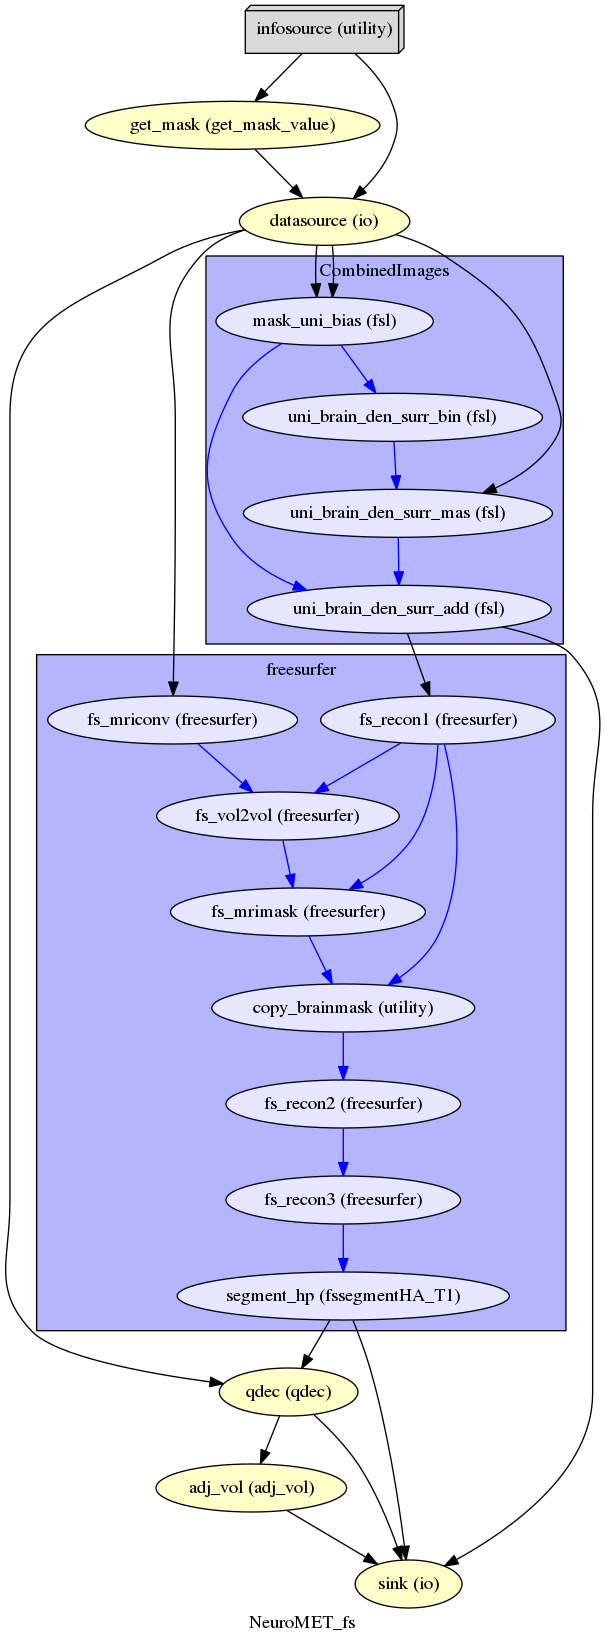

In [13]:
neuromet_fs.write_graph(graph2use = 'colored', dotfilename = './imgs/neuromet_fs')
Image(filename='./imgs/neuromet_fs.png')

In [ ]:
## Run Freesurfer Analysis

In [ ]:
%%time
neuromet2.run('MultiProc', plugin_args={'n_procs': cores})